In [1]:
import numpy as np
from astropy.stats import LombScargle
%matplotlib inline
import matplotlib.pyplot as plt

Generate a Synthetic Lightcurve

First, we need to generate a lightcurve to work with. The function below generates a series of timestamps t, and a sinusoidal signal y with noise dy added to it. We will use this lightcurve to test our functions. Note that our y values are generated with a sin function with a frequency of 2pi, or equiaveletly, a period of 1.

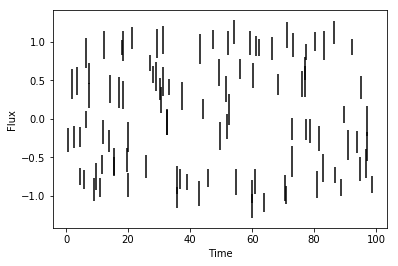

In [2]:
# "Generates a sample lightcurve with times t, magnitudes y, and errors dy

rand = np.random.RandomState(42)
t = 100 * rand.rand(100)
y = np.sin(2 * np.pi * t) + 0.1 * rand.randn(100)
dy = 0.1 * (1 + rand.rand(100))

plt.errorbar(t,y,dy,ls='none',c='k')
plt.xlabel('Time')
plt.ylabel('Flux')


As you can see, this lightcurve is not very interesting when we plot it. This is where we need to use period finding analysis to learn more. Below, we try plotting the function in a new way--phase folding it. When we do this, we assume a period, and compute what phase each timestamps corresponds to between 0 and 1, assuming that period. Below, we try folding our lightcurve with the period equal to 1.

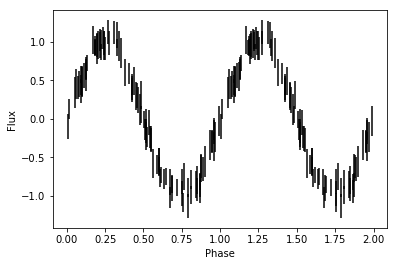

In [3]:
rand = np.random.RandomState(42)
t = 100 * rand.rand(100)
y = np.sin(2 * np.pi * t) + 0.1 * rand.randn(100)
dy = 0.1 * (1 + rand.rand(100))



# "this function takes times t, mags y, and errors dy, and a period and phase folds the lightcurve at this period

def phase_fold(t,y,dy,period):
    phases=np.remainder(t,period)/period
    phases=np.concatenate((phases,phases+1))
    y=np.concatenate((y,y))
    dy=np.concatenate((dy,dy))
    plt.errorbar(phases,y,dy,ls='none',c='k')
    plt.xlabel('Phase')
    plt.ylabel('Flux')
    
phase_fold(t,y,dy,1)


As you can see, in this form we can clearly see this periodic modulation in the lightcurve. This is the exact same data as above, but put in a more useful form. However, for the synthetic data, we know what the period is because we generated the lightcurve with a period=1. In reality though, one usually doesn't know the period beforehand, so now we learn to find it using an algorithm known as lomb scargle.

The function below returns the best period, and the power spectrum (which shows us the relative strength of signals at different frequencies (frequency=1/period). You should see a large spike at a period=1. Try changing the value of the period, and watch the periodogram change.

1.9987063533134721

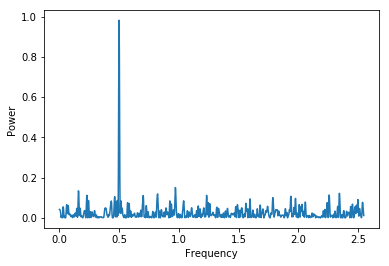

In [4]:
period=2


rand = np.random.RandomState(42)
t = 100 * rand.rand(100)
y = np.sin(2 * np.pi /period* t) + 0.1 * rand.randn(100)
dy = 0.1 * (1 + rand.rand(100))

def lomb_scargle(t,y,dy):

    frequency, power = LombScargle(t, y, dy).autopower()
    plt.plot(frequency, power)
    plt.show
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    return 1/frequency[np.argmax(power)]
lomb_scargle(t,y,dy)

Finally, we are ready to combine what we have learned, and use lomb scargle to search for the best period of our lightcurve, and automatically plot the phase folded lightcurve of the object.

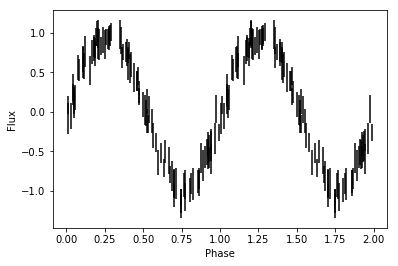

In [5]:
period=0.5


rand = np.random.RandomState(42)
t = 100 * rand.rand(100)
y = np.sin(2 * np.pi /period* t) + 0.1 * rand.randn(100)
dy = 0.1 * (1 + rand.rand(100))

def lomb_scargle(t,y,dy):

    frequency, power = LombScargle(t, y, dy).autopower()
    #plt.plot(frequency, power)
    return 1/frequency[np.argmax(power)]

def plot_best_period(t,y,dy):
    phase_fold(t,y,dy,lomb_scargle(t,y,dy))

plot_best_period(t,y,dy)